In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

The training samples are 50,000. picture size is 32 by 32 and 3 is the RGB


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Lets reshape y_train from 2 dimensional array to 1 dimensional array

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
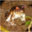

In [5]:

X_train[0]

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
classes[8]

'ship'

In [21]:
 def plot_sample(X, y, index):
    plt.figure(figsize=(10,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

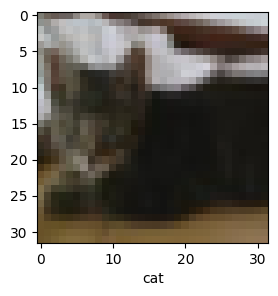

In [25]:
plot_sample(X_train,y_train,9)

# Data Normalization

In [26]:
X_train = X_train/255.0
X_test = X_test/255.0

**First let's build a simple neural network**

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')])

In [29]:
ann.compile(optimizer='SGD',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [30]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 153s 97ms/step - loss: 1.8115 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.6222 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5410 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4830 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4311 - accuracy: 0.4960


#

In [31]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.4969 - accuracy: 0.4627


[1.4968596696853638, 0.4627000093460083]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.64      0.53      1000
           1       0.45      0.78      0.57      1000
           2       0.41      0.32      0.36      1000
           3       0.36      0.22      0.27      1000
           4       0.60      0.16      0.25      1000
           5       0.32      0.52      0.40      1000
           6       0.47      0.63      0.54      1000
           7       0.67      0.42      0.51      1000
           8       0.57      0.65      0.61      1000
           9       0.60      0.30      0.40      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



In [38]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [39]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.4445 - accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0988 - accuracy: 0.6149
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9702 - accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8818 - accuracy: 0.6944
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8190 - accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7555 - accuracy: 0.7387
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7124 - accuracy: 0.7535
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6620 - accuracy: 0.7686
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6232 - accuracy: 0.7811
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.9337 - accuracy: 0.6983


[0.9337195158004761, 0.6983000040054321]

The model has 70% accuracy

lets reshapae our y_test from 2D to 1D

In [42]:
y_test = y_test.reshape(-1,)

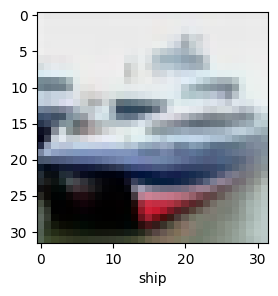

In [44]:
plot_sample(X_test,y_test,1)

Lets use our model to predict

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 17ms/step


array([[3.4482335e-03, 4.4328513e-06, 1.2806006e-02, 9.1030717e-01,
        3.1952470e-05, 6.3030787e-02, 4.9673714e-04, 2.4264149e-05,
        9.8373340e-03, 1.3032964e-05],
       [3.2874721e-03, 9.8249368e-02, 6.2891072e-06, 3.2382673e-07,
        2.0591875e-08, 2.2299293e-08, 1.5127418e-08, 4.3495141e-09,
        8.9843684e-01, 1.9627114e-05],
       [6.4807393e-02, 1.1670079e-02, 1.3252204e-04, 2.5170436e-03,
        7.7612844e-05, 8.9530477e-05, 4.1365736e-05, 2.6492443e-04,
        9.1653025e-01, 3.8692493e-03],
       [8.7122589e-01, 2.2396183e-04, 6.4441422e-04, 4.1085989e-03,
        1.0104888e-03, 4.2365507e-05, 2.2749217e-04, 1.8129147e-04,
        1.2176936e-01, 5.6592486e-04],
       [5.0302219e-06, 3.3728877e-05, 3.5372330e-03, 1.4051206e-01,
        5.0036567e-01, 2.4950304e-03, 3.5300669e-01, 7.0091201e-06,
        3.6914142e-05, 5.5049617e-07]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

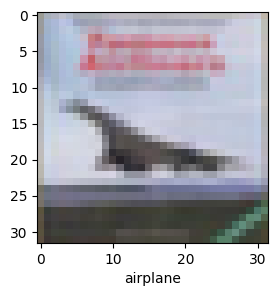

In [56]:
plot_sample(X_test,y_test,3)

In [57]:
classes[y_classes[3]]

'airplane'

In [58]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.83      0.78      0.81      1000
           2       0.60      0.59      0.60      1000
           3       0.47      0.59      0.53      1000
           4       0.66      0.64      0.65      1000
           5       0.63      0.56      0.59      1000
           6       0.82      0.71      0.76      1000
           7       0.81      0.69      0.75      1000
           8       0.81      0.80      0.81      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



The report suggest that the model made with CNN has a better performance compared to the Simple Neural Network

CNN has an accuracy of 70% as compared to SNN which had an accuracy of 46%

The reason for this is because:


*   CNN uses max pooling layers that reduces
*   List item

dimension of images